# Model Training

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats

warnings.filterwarnings('ignore')
%matplotlib inline

### Loading the data

In [171]:
data = pd.read_csv("cleaned_heart_disease_data.csv")

In [172]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,0,2.3,0,0,0
1,41,1,1,135,203,0,1,132,0,0.0,1,0,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,0,1.5,2,2,4
904,62,1,0,166,170,0,2,120,1,3.0,1,2,4
905,56,1,2,170,0,0,0,123,1,2.5,0,1,4
906,56,1,2,144,208,1,2,105,1,1.0,0,0,4


### Spliting the dataset into independent and dependent variables

In [173]:
def dependentIndependentSplit(data, target):
    X = data.drop(target, axis= 1)
    y = data[target]
    
    return X,y
    

In [174]:
X,y = dependentIndependentSplit(data= data,
                                target= 'num')

In [175]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0
1,41,1,1,135,203,0,1,132,0,0.0,1,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,0,1.5,2,2
904,62,1,0,166,170,0,2,120,1,3.0,1,2
905,56,1,2,170,0,0,0,123,1,2.5,0,1
906,56,1,2,144,208,1,2,105,1,1.0,0,0


In [176]:
y

0      0
1      0
2      0
3      0
4      0
      ..
903    4
904    4
905    4
906    4
907    4
Name: num, Length: 908, dtype: int64

### Spliting the data into training and testing data set

In [177]:
from sklearn.model_selection import train_test_split

In [178]:
def trainTestSplit(X,y,size = 0.2):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=size, random_state=34)
    return X_train, X_test, y_train, y_test

In [179]:
X_train, X_test, y_train, y_test = trainTestSplit(X= X,
                                                  y= y,
                                                  size= 0.2)

In [180]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
538,65,1,0,140,306,1,1,87,1,1.5,1,1
341,42,1,2,134,240,1,1,160,0,0.0,0,2
13,53,1,2,130,197,1,0,152,0,1.2,0,1
804,48,1,0,124,274,0,0,166,0,0.5,1,2
636,38,1,0,110,196,0,1,166,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
758,41,1,0,125,0,1,1,176,0,1.6,2,1
873,74,1,3,196,216,1,1,120,0,0.4,2,2
490,61,1,0,140,207,0,0,138,1,1.9,2,2
122,41,1,2,112,250,0,1,179,0,0.0,2,1


In [181]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
48,59,1,2,130,318,0,1,120,1,1.0,1,1
251,56,1,2,130,459,0,1,114,0,0.0,2,1
167,54,1,1,108,309,0,1,156,0,0.0,2,2
880,58,1,0,114,318,0,2,140,0,4.4,0,0
592,57,1,1,140,265,0,2,145,1,1.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
303,45,1,0,140,224,0,1,144,0,0.0,0,1
152,56,1,2,120,0,0,1,97,0,0.0,1,2
179,40,1,3,140,199,0,1,178,1,1.4,2,2
808,66,1,0,150,0,0,1,108,1,2.0,1,2


In [182]:
y_train

538    1
341    0
13     0
804    3
636    1
      ..
758    2
873    3
490    1
122    0
417    1
Name: num, Length: 726, dtype: int64

In [183]:
y_test

48     0
251    0
167    0
880    4
592    1
      ..
303    0
152    0
179    0
808    3
482    1
Name: num, Length: 182, dtype: int64

### Model Training

In [184]:
from sklearn.tree import DecisionTreeClassifier

In [185]:
def modelTraining(X_train,y_train):
    clf_model = DecisionTreeClassifier(random_state=42)
    clf_model.fit(X_train, y_train)
    return clf_model

In [186]:
clf_model = modelTraining(X_train= X_train,
                          y_train= y_train)

### Model Evaluation

In [187]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

In [188]:
def evaluate_model(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average= 'weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    try:
        roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr')
    except ValueError:
        roc_auc = None 
        
    return accuracy, precision, recall, f1, roc_auc

In [189]:
accuracy, precision, recall, f1, roc_auc = evaluate_model(clf = clf_model,
                                                          X_test= X_test,
                                                          y_test= y_test)

In [190]:
accuracy

0.45604395604395603

In [191]:
precision

0.44528006709987933

In [192]:
recall

0.45604395604395603

In [193]:
f1

0.4495383940857707

In [194]:
roc_auc

np.float64(0.5914071604878682)

### ROC AUC Curve

In [195]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [196]:
def plot_roc_curve(clf, X_test, y_test, class_names):
    y_prob = clf.predict_proba(X_test)
    y_test_binarized = label_binarize(y_test, classes=np.arange(len(class_names)))
    plt.figure(figsize=(10, 8))
    for i, class_name in enumerate(class_names):
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"Class {class_name} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve for Multiclass Classification")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

In [197]:
class_names = sorted(y.unique())

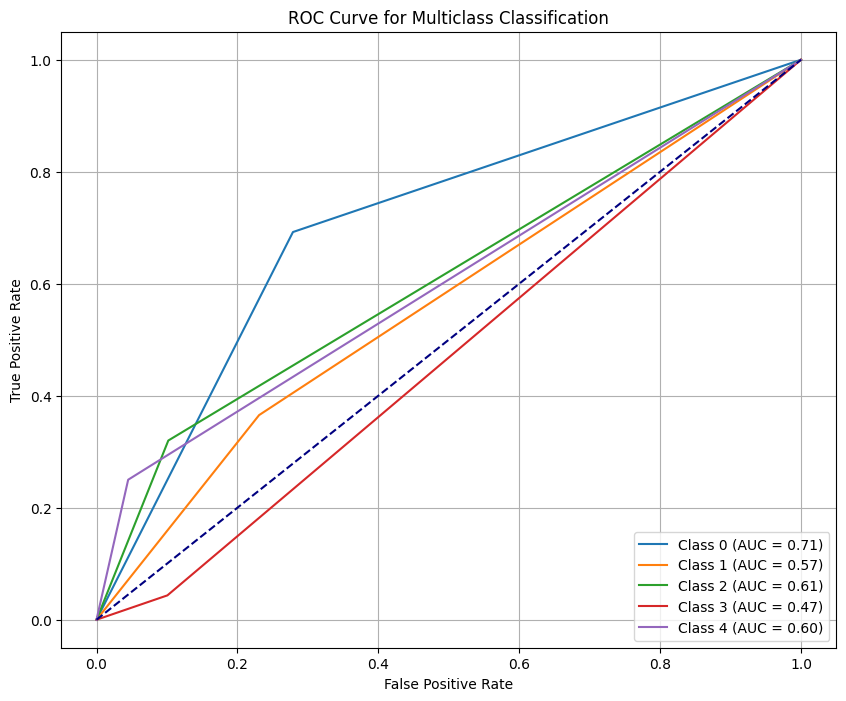

In [198]:
plot_roc_curve(clf= clf_model,
               X_test= X_test,
               y_test= y_test,
               class_names= class_names)

### Decision Tree

In [199]:
from sklearn.tree import plot_tree

In [200]:
def visualize_tree(clf, feature_names,target_classes):
    plt.figure(figsize=(20, 15))
    plot_tree(clf, filled=True, feature_names=feature_names, class_names=target_classes)
    plt.show()

In [201]:
target_classes = [f"Class {cls}" for cls in sorted(y.unique())]

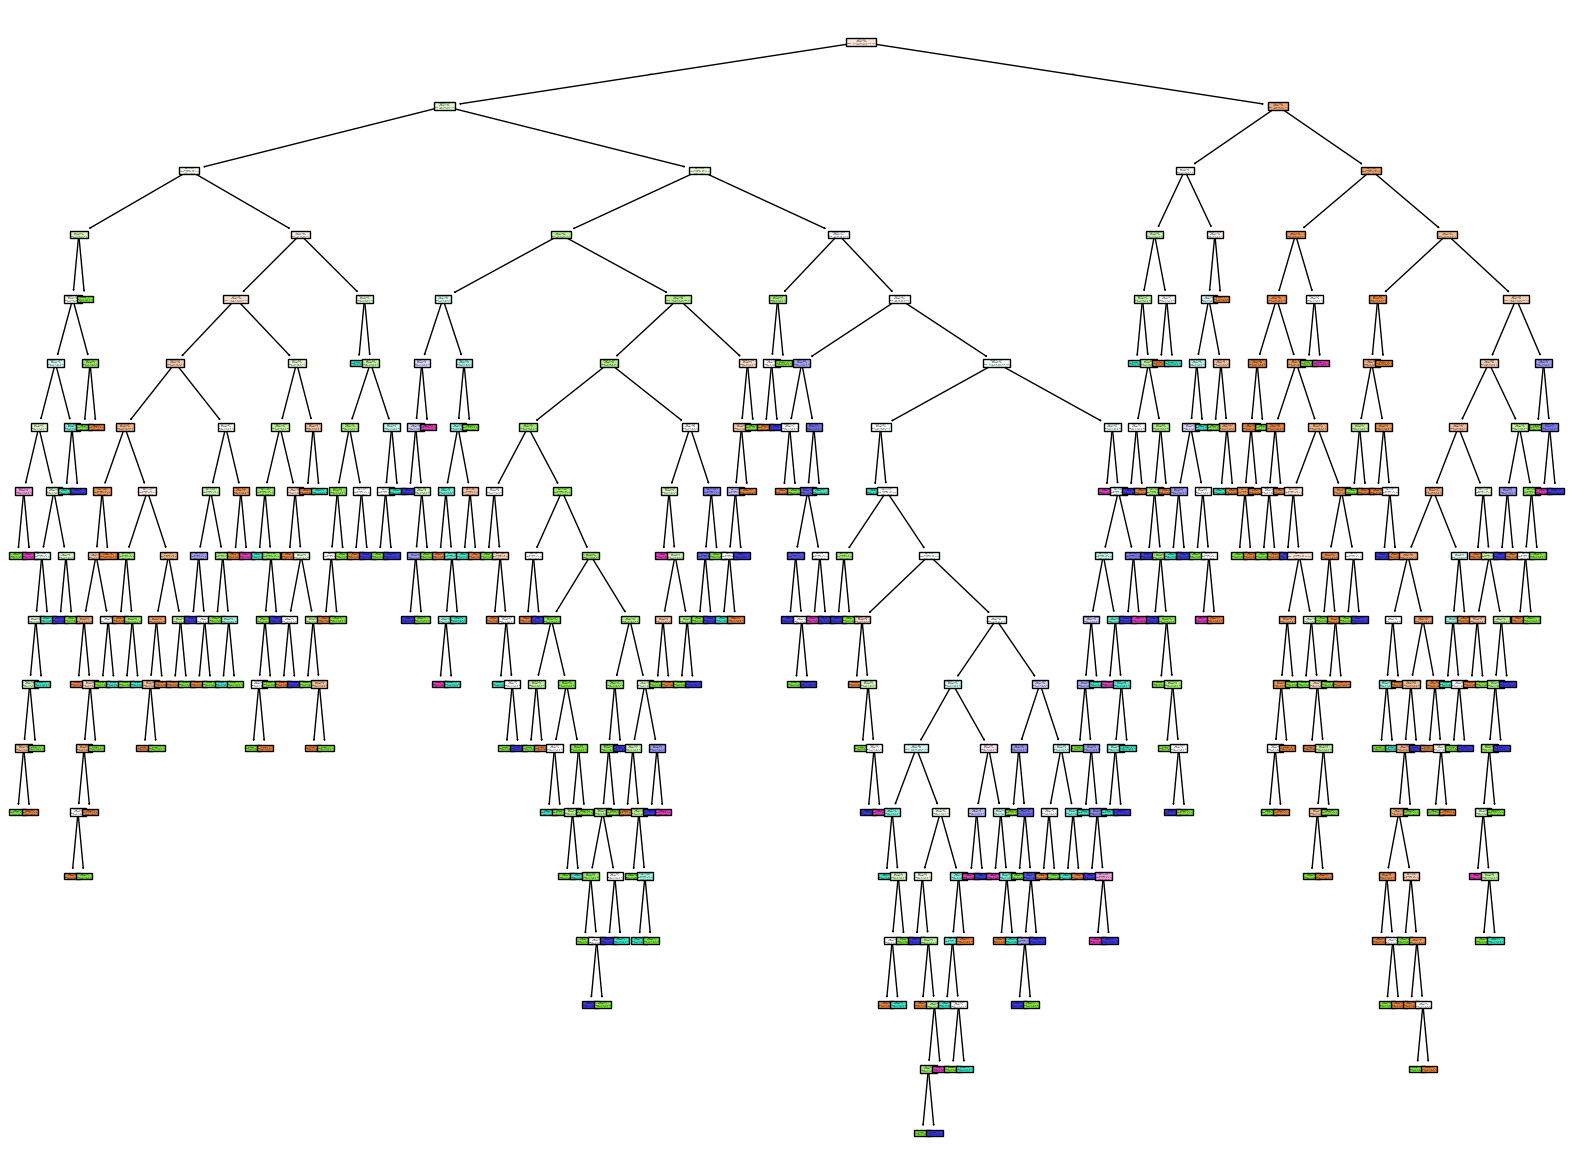

In [202]:
visualize_tree(clf= clf_model,
    feature_names= X.columns,
    target_classes= target_classes)

- The tree looks complex without tuning
- prone to overfitting

### Hyperparameter Tuning

In [203]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [204]:
def perform_grid_search(X_train, y_train, param_grid):
    dt_model = DecisionTreeClassifier(random_state=42)
    grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_params_

In [205]:
def cross_validate_model(model, X, y, cv=5):
    return cross_val_score(model, X, y, cv=cv, scoring='accuracy')

In [206]:
def evaluate_model_tuning(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [207]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [208]:
best_model, best_params = perform_grid_search(X_train, y_train, param_grid)
cv_scores = cross_validate_model(best_model, X_train, y_train)
test_accuracy = evaluate_model_tuning(best_model, X_test, y_test)

In [209]:
print("Best Parameters:", best_params)
print("Cross-Validation Accuracy:", cv_scores.mean())
print("Test Set Accuracy:", test_accuracy)

Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
Cross-Validation Accuracy: 0.5537269721303731
Test Set Accuracy: 0.532967032967033


### Best Model 

In [210]:
best_model

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=2,
                       random_state=42)

### Training the best model

In [211]:
best_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=2,
                       random_state=42)

### Best Model Evaluation

In [212]:
B_accuracy, B_precision, B_recall, b_f1, B_roc_auc = evaluate_model(clf= best_model,
               X_test= X_test,
               y_test = y_test)

In [213]:
B_accuracy

0.532967032967033

In [214]:
B_precision

0.4509307019511101

In [215]:
B_recall

0.532967032967033

In [216]:
b_f1

0.48614239976479645

In [217]:
B_roc_auc

np.float64(0.7345103695150546)

In [218]:
Bestmodel_metrics = {
        "Accuracy": B_accuracy,
        "Precision":B_precision,
        "Recall": B_recall,
        "F1-Score": b_f1,
        "ROC-AUC": B_roc_auc
    }

In [219]:
untuned_model_metrics = {
        "Accuracy": accuracy,
        "Precision":precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc
    }

In [220]:
def print_metrics(metrics,model):
    print(f"\n{model} Model Performance Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}" if isinstance(value, float) else f"{metric}: {value}")

### Tuned Model

In [221]:
print_metrics(metrics=Bestmodel_metrics,
              model= "Tunned")


Tunned Model Performance Metrics:
Accuracy: 0.5330
Precision: 0.4509
Recall: 0.5330
F1-Score: 0.4861
ROC-AUC: 0.7345


### UnTunned Model

In [222]:
print_metrics(metrics= untuned_model_metrics,
              model= "Untunned")


Untunned Model Performance Metrics:
Accuracy: 0.4560
Precision: 0.4453
Recall: 0.4560
F1-Score: 0.4495
ROC-AUC: 0.5914


### Roc Plot of tunned model

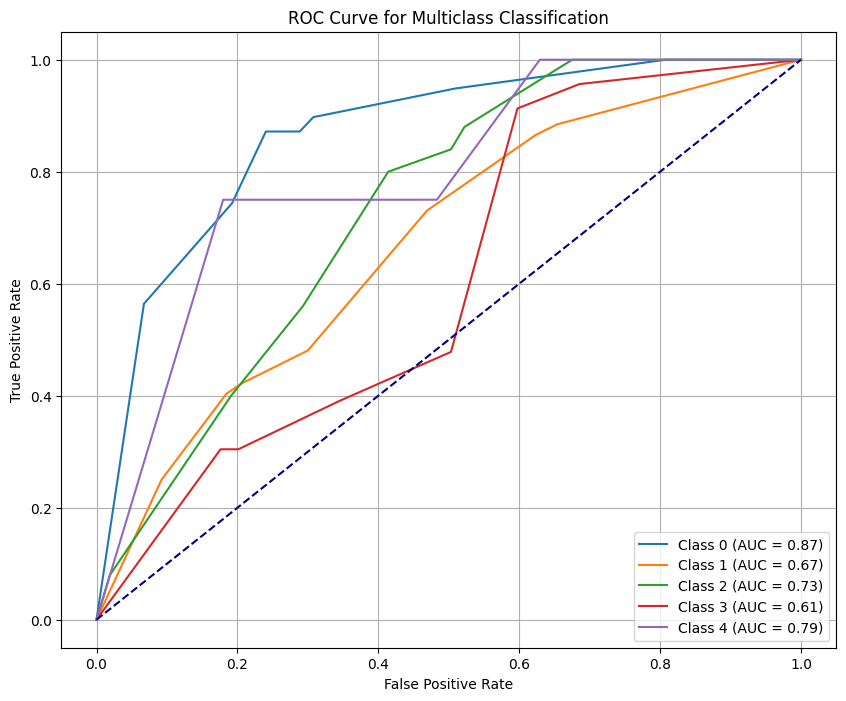

In [223]:
plot_roc_curve(clf=best_model,
               X_test= X_test,
               y_test= y_test,
               class_names= class_names)

### Decision Tree visualizations of tunned tree

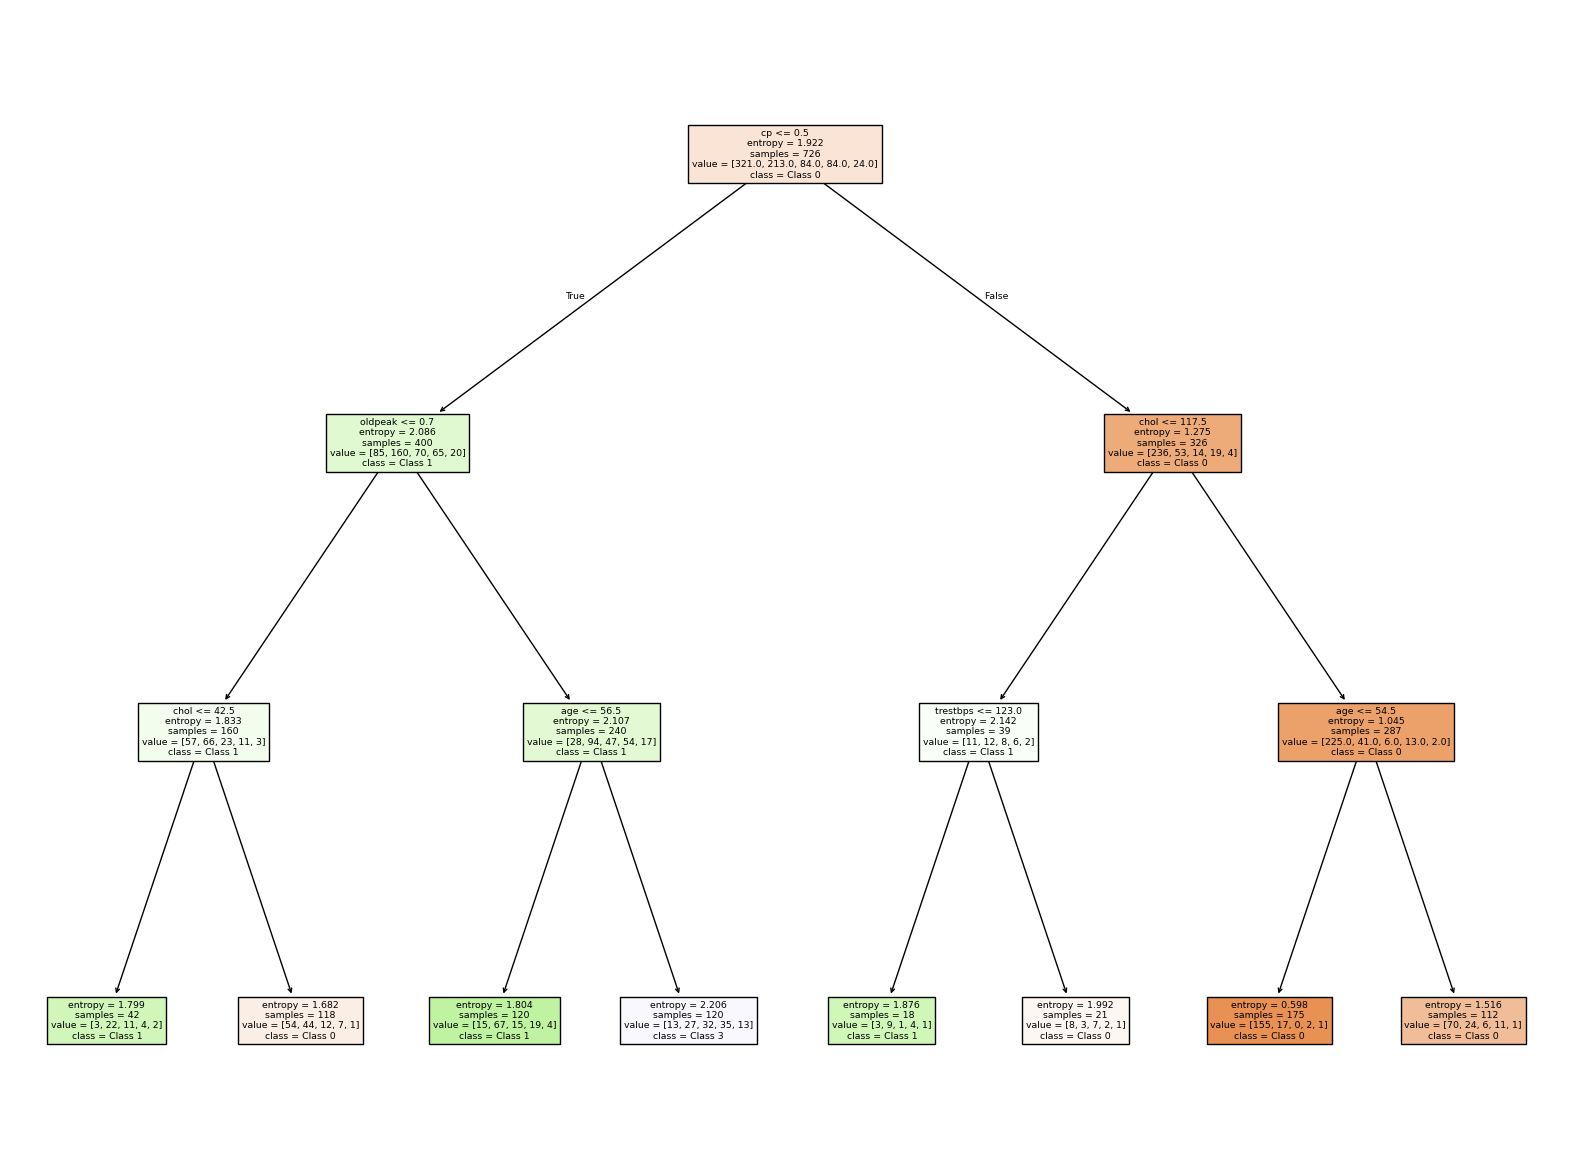

In [224]:
visualize_tree(clf= best_model,
               feature_names= X.columns,
               target_classes= target_classes)